In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import seaborn as sns
from tabulate import tabulate 

Считаем файлы в датафреймы

In [2]:
accept_df = pd.read_csv('20_accept.csv')
reject_df = pd.read_csv('20_reject.csv')

Проверим есть ли пропуски в целевой переменной

In [43]:
print("Все хорошо! Пропусков в таргете нет )" if not accept_df.target.isna().sum() else "Есть пропуски")

Все хорошо! Пропусков в таргете нет )


In [44]:
accept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13094 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32511 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24217 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22460 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32502 non-null  float64
 11  inquiry_14_day             23400 non-null  float64
 12  inquiry_21_day             23400 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

In [45]:
accept_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Columns: 15 entries, target to UID
dtypes: float64(9), int64(3), object(3)
memory usage: 3.7+ MB


In [46]:
accept_df.describe()

,target,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,32554.000000,3.190100e+04,32511.000000,32554.000000,24217.000000,22460.000000,32554.000000,32502.000000,23400.000000,23400.000000,32554.000000,32554.000000
mean,0.021411,6.154986e+04,0.007505,0.389752,0.670645,19.049060,36.480220,4.891766,0.360427,0.427094,7.225088,70383.331449
std,0.144751,1.036028e+05,0.108138,0.487702,0.835817,134.965621,8.228790,5.301986,0.610469,0.690228,3.348552,40590.154092
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-66.559028,25.000741,-4.600000,0.000000,0.000000,-0.019126,7.000000
25%,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.529452,29.530362,1.227014,0.000000,0.000000,4.960678,35324.000000
50%,0.000000,4.157600e+04,0.000000,0.000000,0.000000,0.925482,34.761213,3.227397,0.000000,0.000000,7.743169,70243.000000
75%,0.000000,7.000000e+04,0.000000,1.000000,1.000000,3.501036,42.367123,6.475850,1.000000,1.000000,9.906849,105382.250000
max,1.000000,1.145038e+07,4.000000,1.000000,8.000000,1365.276703,58.898817,101.192365,6.000000,8.000000,15.805479,140904.000000


In [48]:
accept_df.isna().sum(axis=0) / accept_df.shape[0]

target                       0.000000
INCOME_TYPE                  0.000000
EDUCATION_                   0.000000
CUSTOMER_CATEGORY_           0.597776
income                       0.020059
DEPENDANT_NUMBER             0.001321
IS_EMPL                      0.000000
COUNT_ACTIVE_CREDIT_NO_CC    0.256098
CNT_MNTH_FROM_LAST_PMNT      0.310069
age                          0.000000
experience                   0.001597
inquiry_14_day               0.281194
inquiry_21_day               0.281194
count_mnth_act_passport      0.000000
UID                          0.000000
dtype: float64

In [49]:
accept_df.INCOME_TYPE.unique()

array(['OTHER', '2NDFL'], dtype=object)

In [50]:
for col in accept_df:
    print(accept_df[col].unique())

[0 1]
['OTHER' '2NDFL']
['elementary' 'high' 'advanced' 'beginner']
[nan 'Corporate' 'VIP']
[140000. 119510. 146841. ...  23586.  49296.  23273.]
[ 0.  1.  2.  3.  4. nan]
[0 1]
[ 0.  1.  2. nan  6.  3.  5.  4.  7.  8.]
[34.21854839  1.115569   30.53091398 ...  3.82251344  0.17556004
  0.9875448 ]
[38.49710308 28.19178082 36.53107268 ... 29.71658058 25.79583053
 25.03440377]
[4.06010929 2.03287671 0.57764803 ... 5.36315592 2.53134217 1.82070514]
[nan  1.  0.  2.  5.  3.  4.  6.]
[nan  1.  0.  2.  3.  5.  4.  7.  6.  8.]
[10.05600719  8.10958904  7.73770492 ...  5.76021409  6.59435586
  5.01522569]
[     7     11     17 ... 140245 140396 140674]


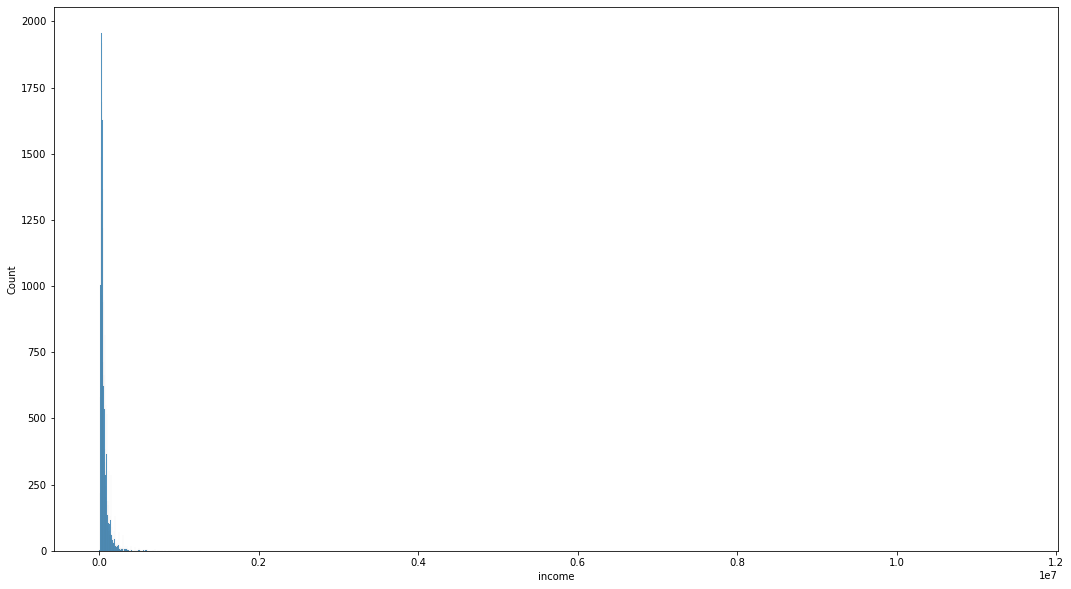

In [51]:
plt.figure(figsize=(18, 10))
sns.histplot(accept_df.income)
plt.show()

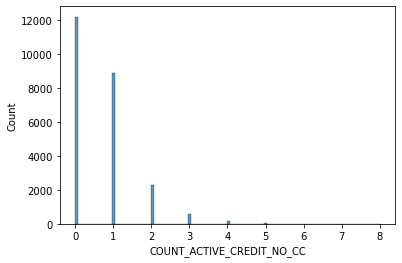

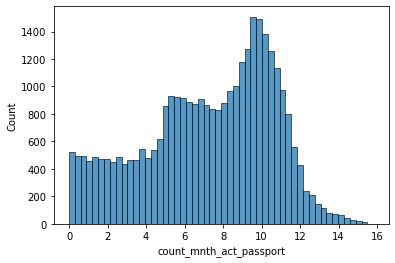

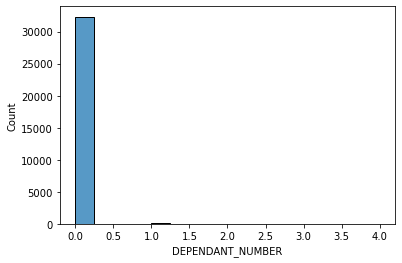

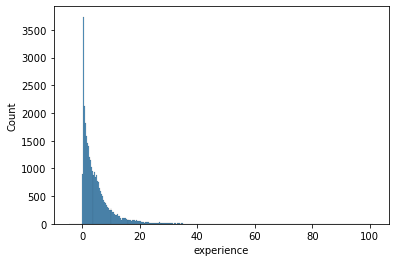

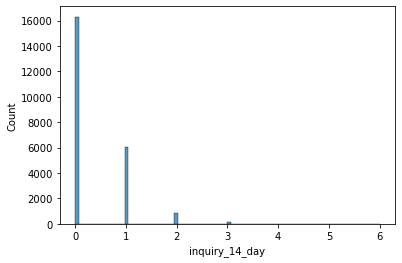

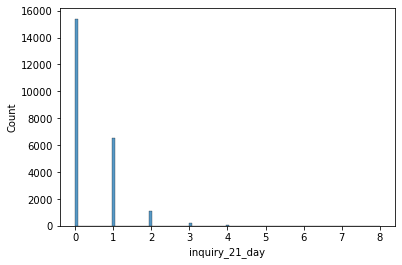

In [52]:
numerical = ['COUNT_ACTIVE_CREDIT_NO_CC', 'count_mnth_act_passport', 'DEPENDANT_NUMBER',
             'experience',
            'inquiry_14_day', 'inquiry_21_day']
for cat in numerical:
    sns.histplot(accept_df[cat])
    plt.show()

In [53]:
accept_df.columns

Index(['target', 'INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 'income',
       'DEPENDANT_NUMBER', 'IS_EMPL', 'COUNT_ACTIVE_CREDIT_NO_CC',
       'CNT_MNTH_FROM_LAST_PMNT', 'age', 'experience', 'inquiry_14_day',
       'inquiry_21_day', 'count_mnth_act_passport', 'UID'],
      dtype='object')

In [54]:
accept_df.groupby(by=['EDUCATION_']).count()

,target,INCOME_TYPE,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
EDUCATION_,,,,,,,,,,,,,,
advanced,8433,8433,3543,8370,8407,8433,6222,5688,8433,8408,5973,5973,8433,8433
beginner,1534,1534,554,1421,1529,1534,1217,1160,1534,1529,1183,1183,1534,1534
elementary,21380,21380,8466,20909,21368,21380,15858,14782,21380,21358,15354,15354,21380,21380
high,1207,1207,531,1201,1207,1207,920,830,1207,1207,890,890,1207,1207


In [55]:
accept_df.groupby(by=['CUSTOMER_CATEGORY_']).count()

,target,INCOME_TYPE,EDUCATION_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
CUSTOMER_CATEGORY_,,,,,,,,,,,,,,
Corporate,12689,12689,12689,12674,12685,12689,9302,8425,12689,12686,8933,8933,12689,12689
VIP,405,405,405,401,405,405,360,352,405,405,355,355,405,405


In [56]:
accept_df.groupby(by=['INCOME_TYPE']).count()

,target,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
INCOME_TYPE,,,,,,,,,,,,,,
2NDFL,10669,10669,700,10038,10639,10669,7499,6853,10669,10633,7215,7215,10669,10669
OTHER,21885,21885,12394,21863,21872,21885,16718,15607,21885,21869,16185,16185,21885,21885


In [90]:
numerical = set(['COUNT_ACTIVE_CREDIT_NO_CC', 'count_mnth_act_passport', 
             'DEPENDANT_NUMBER', 'experience',
            'inquiry_14_day', 'inquiry_21_day', 'income', 'CNT_MNTH_FROM_LAST_PMNT'])

categorical = set(['EDUCATION_', 'CUSTOMER_CATEGORY_', 'INCOME_TYPE'])

In [102]:
def fillna_(df : pd.DataFrame, categorical : set, numerical : set) -> pd.DataFrame:
    df_copy = df.copy()
    for feature in (categorical | numerical):
        value = df[feature].mean() if feature in numerical else df[feature].mode()[0]
        df_copy[feature].fillna(value, inplace=True)            
    return df_copy

In [103]:
numerical | categorical

{'CNT_MNTH_FROM_LAST_PMNT',
 'COUNT_ACTIVE_CREDIT_NO_CC',
 'CUSTOMER_CATEGORY_',
 'DEPENDANT_NUMBER',
 'EDUCATION_',
 'INCOME_TYPE',
 'count_mnth_act_passport',
 'experience',
 'income',
 'inquiry_14_day',
 'inquiry_21_day'}

In [111]:
accept = fillna_(accept_df, categorical, numerical)

In [112]:
accept_df.isna().sum()

target                           0
INCOME_TYPE                      0
EDUCATION_                       0
CUSTOMER_CATEGORY_           19460
income                         653
DEPENDANT_NUMBER                43
IS_EMPL                          0
COUNT_ACTIVE_CREDIT_NO_CC     8337
CNT_MNTH_FROM_LAST_PMNT      10094
age                              0
experience                      52
inquiry_14_day                9154
inquiry_21_day                9154
count_mnth_act_passport          0
UID                              0
dtype: int64

In [113]:
accept_df['CUSTOMER_CATEGORY_'].mode()[0]

'Corporate'

In [114]:
accept

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,Corporate,140000.0,0.0,0,0.000000,34.218548,38.497103,4.060109,0.360427,0.427094,10.056007,7
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.000000,1.115569,28.191781,2.032877,1.000000,1.000000,8.109589,11
2,0,OTHER,elementary,VIP,146841.0,0.0,1,0.000000,30.530914,36.531073,0.577648,0.000000,0.000000,7.737705,17
3,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.000000,1.174485,54.064219,1.458739,0.000000,0.000000,8.888876,21
4,0,OTHER,elementary,Corporate,183461.0,0.0,1,0.000000,1.186985,44.063014,0.512194,1.000000,1.000000,2.649315,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Corporate,78000.0,0.0,0,0.670645,19.049060,54.251037,0.371585,0.360427,0.427094,6.749667,140104
32550,1,OTHER,advanced,Corporate,40000.0,0.0,0,0.670645,19.049060,29.716581,5.363156,0.360427,0.427094,6.935759,140165
32551,1,2NDFL,elementary,Corporate,49296.0,0.0,0,0.000000,19.049060,25.795831,4.139344,1.000000,2.000000,5.760214,140245
32552,1,2NDFL,advanced,Corporate,23273.0,0.0,0,0.000000,19.049060,27.453552,2.531342,1.000000,1.000000,6.594356,140396
